In [1]:
import numpy as np
import pandas as pd
npm = 2006485011
data = {'npm':np.random.randint(npm-1000,npm+1000,1000),
       'nilai uts': np.random.binomial(100,0.7,1000),
       'nilai uas': np.random.binomial(100,0.3,1000),
       'nilai tugas':np.random.normal(80,10,1000),
       'kelas':250*['A','B','C','D']}

df = pd.DataFrame(data)
df

,npm,nilai uts,nilai uas,nilai tugas,kelas
0,2006485204,66,31,86.821459,A
1,2006484303,62,34,91.306369,B
2,2006485822,71,25,81.793274,C
3,2006484498,69,27,86.135951,D
4,2006484450,70,30,74.725708,A
...,...,...,...,...,...
995,2006485664,69,28,63.143801,D
996,2006484501,68,26,65.064872,A
997,2006485635,78,31,86.317291,B
998,2006484337,67,27,83.266266,C


In [3]:
df["nilai akhir"]=  df['nilai uts']*0.35+df['nilai uas']*0.4+df['nilai tugas']*0.25

In [6]:
range_nilai = [(df['nilai akhir']>=85), (df['nilai akhir']<85)&(df['nilai akhir']>=75), (df['nilai akhir']<75)&(df['nilai akhir']>=65), (df['nilai akhir']<65)&(df['nilai akhir']>=55),
               (df['nilai akhir']<55)]
huruf = ['A','B','C','D','E']
df['nilai huruf'] = np.select(range_nilai,huruf)

In [7]:
df

,npm,nilai uts,nilai uas,nilai tugas,kelas,nilai akhir,nilai huruf
0,2006485204,66,31,86.821459,A,57.205365,D
1,2006484303,62,34,91.306369,B,58.126592,D
2,2006485822,71,25,81.793274,C,55.298318,D
3,2006484498,69,27,86.135951,D,56.483988,D
4,2006484450,70,30,74.725708,A,55.181427,D
...,...,...,...,...,...,...,...
995,2006485664,69,28,63.143801,D,51.135950,E
996,2006484501,68,26,65.064872,A,50.466218,E
997,2006485635,78,31,86.317291,B,61.279323,D
998,2006484337,67,27,83.266266,C,55.066566,D


In [15]:
df.groupby(['kelas','nilai huruf']).sum()

npm  nilai uts  nilai uas   nilai tugas  \
kelas nilai huruf                                                     
A     C            4.012971e+09      146.0       88.0    192.549067   
      D            3.210376e+11    11380.0     5004.0  13477.785829   
      E            1.765707e+11     5919.0     2374.0   6332.930673   
B     C            2.006486e+09       75.0       40.0     92.287355   
      D            3.009728e+11    10583.0     4758.0  12482.844949   
      E            1.986420e+11     6650.0     2748.0   7105.216355   
C     C            6.019455e+09      214.0      117.0    297.846131   
      D            3.310700e+11    11646.0     5196.0  13791.476890   
      E            1.645318e+11     5564.0     2255.0   5940.146646   
D     C            4.012969e+09      149.0       82.0    187.894481   
      D            3.170246e+11    11255.0     4986.0  13204.417376   
      E            1.805837e+11     6057.0     2478.0   6526.981752   

                   nilai akhir  
kelas nilai huruf               
A     C             134.437267  
      D            9354.046457  
      E            4604.482668  
B     C              65.321839  
      D            8727.961237  
      E            5203.004089  
C     C             196.161533  
      D            9602.369223  
      E            4334.436662  
D     C             131.923620  
      D            9234.754344  
      E            4742.895438

In [16]:
import seaborn as sns

In [27]:
df2 = pd.DataFrame({'total': df.groupby(['kelas','nilai huruf']).size()}).unstack(fill_value=0)

In [28]:
df2

total         
nilai huruf     C    D   E
kelas                     
A               2  160  88
B               1  150  99
C               3  165  82
D               2  158  90

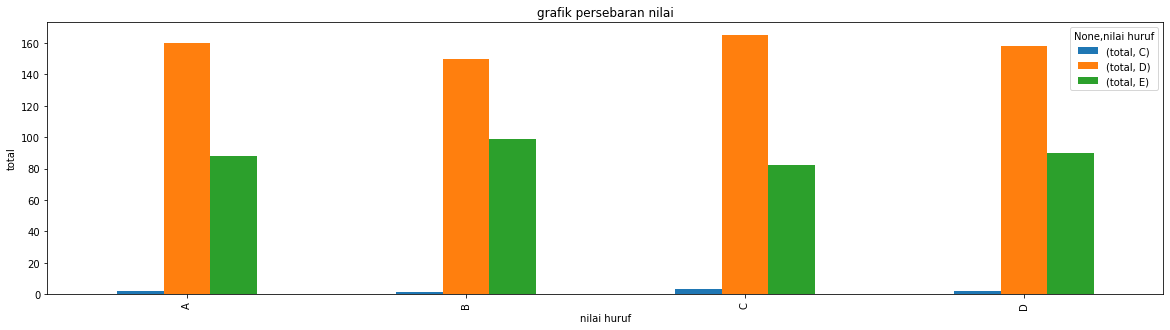

In [36]:
import matplotlib.pyplot as plt
df2.plot(kind='bar', figsize=(20,5))
plt.xlabel('nilai huruf')
plt.ylabel('total')
plt.title('grafik persebaran nilai')
plt.show()

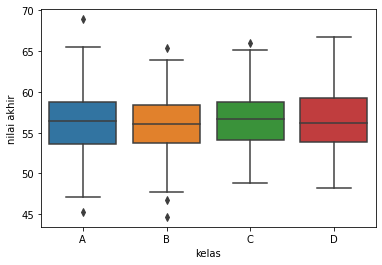

In [45]:
sns.boxplot(x="kelas", y= "nilai akhir", data=df)